### Imports

In [1]:
from mlp import train, Dense, predict_with_layer_value
from activation_functions import Sigmoid
from mse import mse, mse_derivative
from utils import fonts_to_bitmap, bitmap_as_matrix, plot_bitmap_matrix, plot_latent_spaces, get_config_params
from data.font import fontDict
import numpy as np
import matplotlib.pyplot as plt

### Config params

In [2]:
learning_rate, max_epochs, bias, beta1, beta2, epsilon, optimizer, activation, hidden_layers, latent_space = get_config_params('./linear_ae.json')

mse_list = []

In [3]:
bitmapDict = fonts_to_bitmap(fontDict)
bitmapList = list(bitmapDict.values())  
X = np.reshape(bitmapList,(len(bitmapList), 35, 1))

### 35x20x10x2x10x20x35

In [4]:
# El espacio latente es la salida de la "capa 6"
autoencoder = [
    Dense(35, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 2, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(2, 10, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(10, 20, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
    Dense(20, 35, optimizer_type=optimizer, learning_rate=learning_rate),
    Sigmoid(),
]
error = train(autoencoder, mse, mse_derivative, X, X, epochs=max_epochs, verbose=False)

mse_list.append(error)

In [5]:
# autoencoder = [
#     Dense(35, 15, optimizer_type=optimizer, learning_rate=learning_rate),
#     Sigmoid(),
#     Dense(15, 2, optimizer_type=optimizer, learning_rate=learning_rate),
#     Sigmoid(),
#     Dense(2, 15, optimizer_type=optimizer, learning_rate=learning_rate),
#     Sigmoid(),
#     Dense(15, 35, optimizer_type=optimizer, learning_rate=learning_rate),
#     Sigmoid(),
# ]
# error = train(autoencoder, mse, mse_derivative, X, X, epochs=max_epochs, verbose=False)

# mse_list.append(error)

### Error across epochs

In [6]:
# ARQUITECTURES_LABELS = ["35x20x10x2x10x20x35","35x15x2x15x35"]

# colors = ['blue','red']

# for i, mse_values in enumerate(mse_list):
#     plt.plot(range(1, len(mse_values) + 1), mse_values, color=colors[i], label=f"{ARQUITECTURES_LABELS[i]}")

# plt.title('MSE across epochs for different arquitectures')
# plt.xlabel('Epochs')
# plt.ylabel('Error (MSE)')
# plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))  
# plt.show()

### Original vs Predicted

['`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', 'DEL']


j:\SIA\TPs-SIA\Tp5\utils.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(3, 2)) # 1 fila, 2 columnas


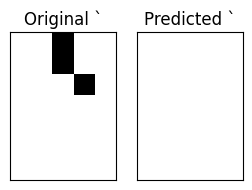

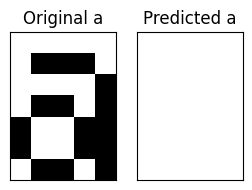

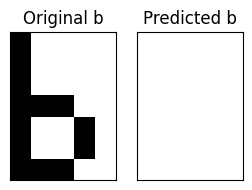

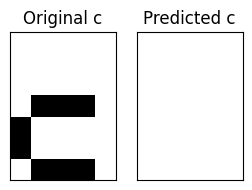

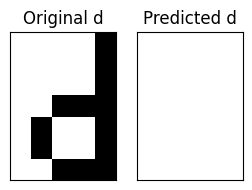

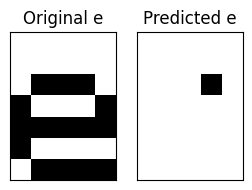

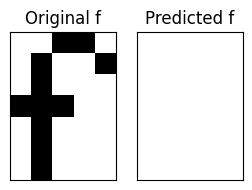

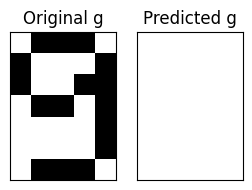

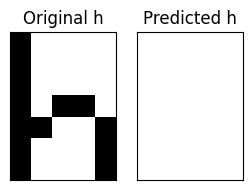

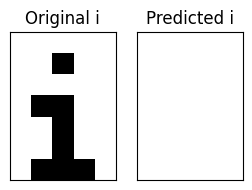

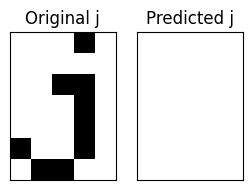

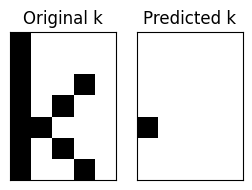

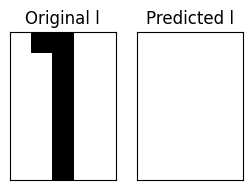

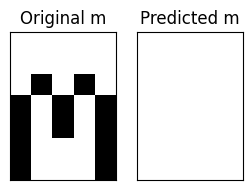

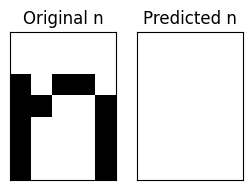

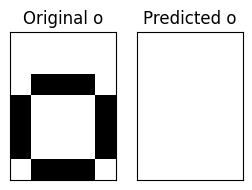

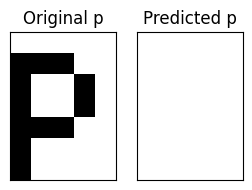

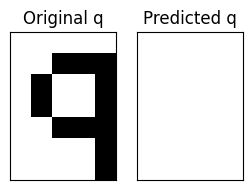

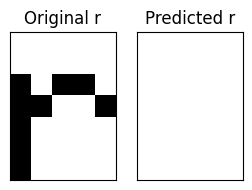

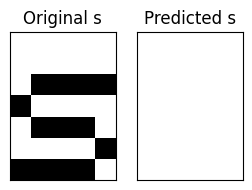

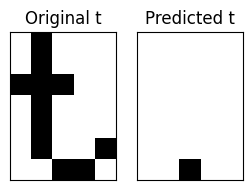

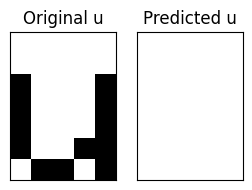

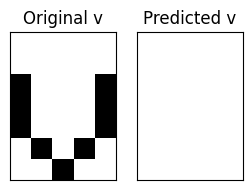

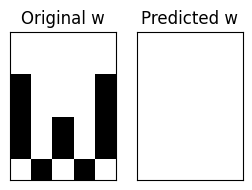

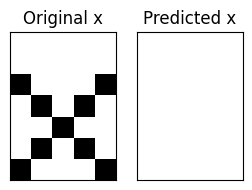

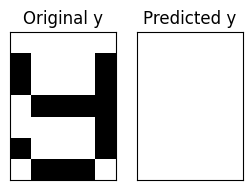

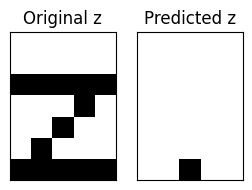

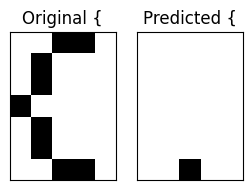

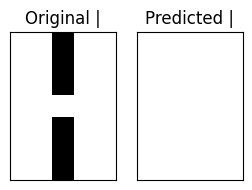

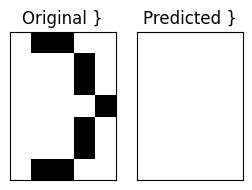

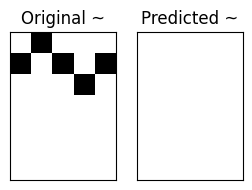

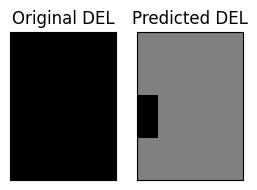

In [7]:
characters = list(bitmapDict.keys())
print(characters)

latent_spaces = []
for c in range(len(characters)):
    input_bitmap = []
    output_bitmap = []

    # X es una lista de listas de -listas con un solo elemento-
    for i in range(len(X[c])):
        input_bitmap.append(X[c][i][0])
    input_bitmap_matrix = bitmap_as_matrix(input_bitmap)

    # El espacio latente es la salida de la "capa 6"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, X[c], 6)
    latent_spaces.append((raw_latent_space[0][0], raw_latent_space[1][0]))

    for output in outputs:
        # Para tanh, deberia ser "1 if num[0] > 0 else 0"?
        output_bitmap.append(round(output[0]))
        
    output_bitmap_matrix = bitmap_as_matrix(output_bitmap)

    # Marcamos en gris los pixeles que cambiaron
    for i in range(len(output_bitmap_matrix)):
        for j in range(len(output_bitmap_matrix[i])):
            if output_bitmap_matrix[i][j] != input_bitmap_matrix[i][j]:
                output_bitmap_matrix[i][j] = 0.3
    
    plot_bitmap_matrix(input_bitmap_matrix, output_bitmap_matrix, characters[c])

### Latent Space

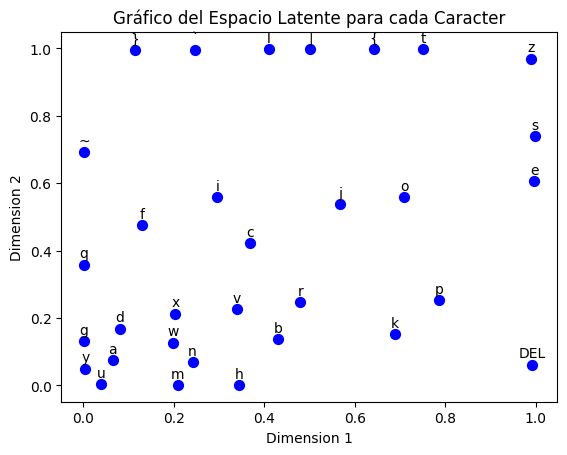

In [8]:
plot_latent_spaces(latent_spaces, characters)

### Caracteres Nuevos

['@', 'A', '+']


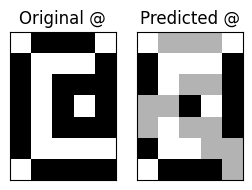

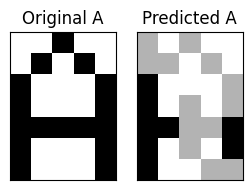

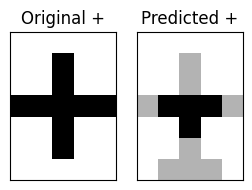

In [9]:

bitmap_at = [
    [0], [1], [1], [1], [0],
    [1], [0], [0], [0], [1],
    [1], [0], [1], [1], [1],
    [1], [0], [1], [0], [1],
    [1], [0], [1], [1], [1],
    [1], [0], [0], [0], [0],
    [0], [1], [1], [1], [1]
]

bitmap_A = [
    [0], [0], [1], [0], [0],
    [0], [1], [0], [1], [0],
    [1], [0], [0], [0], [1],
    [1], [0], [0], [0], [1],
    [1], [1], [1], [1], [1],
    [1], [0], [0], [0], [1],
    [1], [0], [0], [0], [1]
]

bitmap_plus = [
    [0], [0], [0], [0], [0],
    [0], [0], [1], [0], [0],
    [0], [0], [1], [0], [0],
    [1], [1], [1], [1], [1],
    [0], [0], [1], [0], [0],
    [0], [0], [1], [0], [0],
    [0], [0], [0], [0], [0],
]

new_X = [bitmap_at, bitmap_A, bitmap_plus] 
new_characters = ["@", "A", "+"]
print(new_characters)


new_latent_spaces = []
for c in range(len(new_characters)):
    input_bitmap = []
    output_bitmap = []

    # X es una lista de listas de -listas con un solo elemento-
    for i in range(len(new_X[c])):
        input_bitmap.append(new_X[c][i][0])
    input_bitmap_matrix = bitmap_as_matrix(input_bitmap)

    # El espacio latente es la salida de la "capa 6"
    outputs, raw_latent_space = predict_with_layer_value(autoencoder, new_X[c], 6)
    new_latent_spaces.append((raw_latent_space[0][0], raw_latent_space[1][0]))

    for output in outputs:
        # Para tanh, deberia ser "1 if num[0] > 0 else 0"?
        output_bitmap.append(round(abs(output[0])))
    

    output_bitmap_matrix = bitmap_as_matrix(output_bitmap)

    # Marcamos en gris los pixeles que cambiaron
    for i in range(len(output_bitmap_matrix)):
        for j in range(len(output_bitmap_matrix[i])):
            if output_bitmap_matrix[i][j] != input_bitmap_matrix[i][j]:
                output_bitmap_matrix[i][j] = 0.3
    
    plot_bitmap_matrix(input_bitmap_matrix, output_bitmap_matrix, new_characters[c])

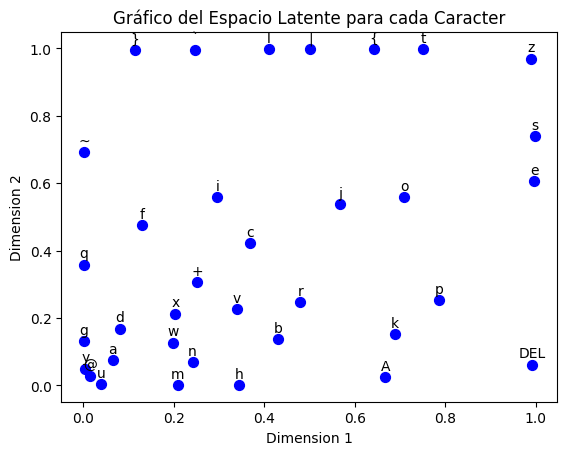

In [10]:
final_chars = characters + new_characters
final_latent_spaces = latent_spaces + new_latent_spaces
plot_latent_spaces(final_latent_spaces, final_chars)